In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('NBA Dataset.csv')
df['TOP 4'] = [1 if i == "Yes" else 0 for i in df['TOP 4']]

In [3]:
#Split in 70% train and 30% test set
train_df, test_df = train_test_split(df, test_size = 0.3, random_state= 42)
 
#Separate target label
y_train = train_df['TOP 4']
y_test = test_df['TOP 4']
 
#Drop target label
x_train = train_df.drop(['TOP 4'], axis = 1)
x_test = test_df.drop(['TOP 4'],   axis = 1)

In [4]:
df_final_test = pd.read_csv("NBA Testing Data.csv")
df_final_test.drop(["TEAM", "SEASON", "CONFERENCE", "TOP 8"], axis = 1, inplace = True)
df_final_test['TOP 4'] = [1 if i == "Yes" else 0 for i in df_final_test['TOP 4']]
x_test_final = df_final_test.drop(["TOP 4"], axis = 1)
y_test_final = df_final_test["TOP 4"]

In [5]:
def expected_value_calculator(TP,TN,FP,FN):
    # Assign hypothetical costs/values to each outcome
    C_TP = 100  # Benefit of correctly identifying a top 4 team
    C_TN = 50   # Benefit of correctly identifying a non-top 4 team
    C_FP = -50  # Cost of wrongly identifying a team as top 4
    C_FN = -100 # Cost of missing a top 4 team

    # Calculate the expected value
    expected_value = (C_TP * TP) + (C_TN * TN) + (C_FP * FP) + (C_FN * FN)

    print("Expected Value:", expected_value)

## Benchmark - n_neighbors = 4

In [6]:
model = KNeighborsClassifier()
parameters = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [7]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8667


Parameters that give the best results : 

 {'n_neighbors': 4}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=4)


In [8]:
y_pred = grid_search.best_estimator_.predict(x_test)

# Calculate accuracy on the training set
training_accuracy = grid_search.best_estimator_.score(x_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search.best_estimator_.score(x_test, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred))

Training Accuracy: 0.9190
Testing Accuracy: 0.9222
F1 Score: 0.9246
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.50      0.57      0.53         7

    accuracy                           0.92        90
   macro avg       0.73      0.76      0.75        90
weighted avg       0.93      0.92      0.92        90



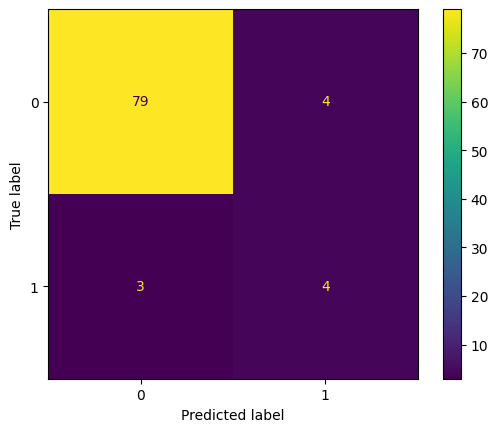

In [9]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [10]:
y_pred_final = grid_search.best_estimator_.predict(x_test_final)

# Calculate accuracy on the training set
training_accuracy = grid_search.best_estimator_.score(x_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search.best_estimator_.score(x_test_final, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final))

Training Accuracy: 0.9190
Testing Accuracy: 0.8000
F1 Score: 0.7704
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.00      0.00      0.00         4

    accuracy                           0.80        30
   macro avg       0.43      0.46      0.44        30
weighted avg       0.74      0.80      0.77        30



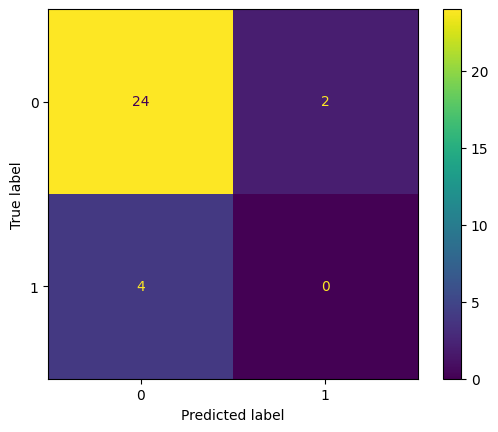

In [11]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [12]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 700


## GridSearchCV

In [13]:
model = KNeighborsClassifier()
parameters = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
            'weights':['uniform','distance'], 
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search2 = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           cv = skf)

# performing grid search on the training data set
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [14]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search2.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search2.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search2.best_estimator_))

GridSearch CV best score : 0.8810


Parameters that give the best results : 

 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=3)


In [15]:
y_pred2 = grid_search2.best_estimator_.predict(x_test)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred2, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred2))

Training Accuracy: 0.9333
Testing Accuracy: 0.9333
F1 Score: 0.9399
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        83
           1       0.55      0.86      0.67         7

    accuracy                           0.93        90
   macro avg       0.77      0.90      0.81        90
weighted avg       0.95      0.93      0.94        90



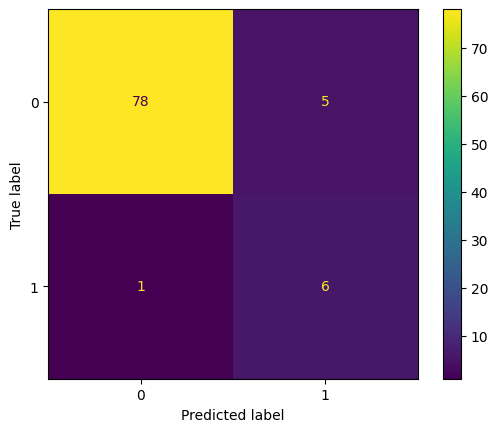

In [16]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [17]:
y_pred_final2 = grid_search2.best_estimator_.predict(x_test_final)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_final, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final2, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final2))

Training Accuracy: 0.9333
Testing Accuracy: 0.8333
F1 Score: 0.8410
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.40      0.50      0.44         4

    accuracy                           0.83        30
   macro avg       0.66      0.69      0.67        30
weighted avg       0.85      0.83      0.84        30



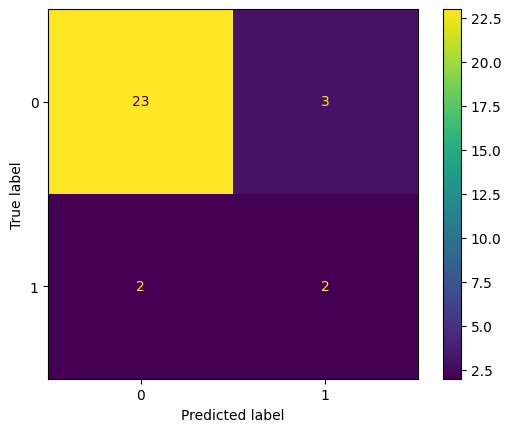

In [18]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [19]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 1000


## Normalization w/ MinMaxScaler

In [20]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_final_scaled = scaler.transform(x_test_final)

In [21]:
grid_search2.fit(x_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [22]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search2.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search2.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search2.best_estimator_))

GridSearch CV best score : 0.8714


Parameters that give the best results : 

 {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=8, weights='distance')


In [23]:
y_pred3 = grid_search2.best_estimator_.predict(x_test_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_scaled, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_scaled, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred3, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred3))

Training Accuracy: 1.0000
Testing Accuracy: 0.9667
F1 Score: 0.9677
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.75      0.86      0.80         7

    accuracy                           0.97        90
   macro avg       0.87      0.92      0.89        90
weighted avg       0.97      0.97      0.97        90



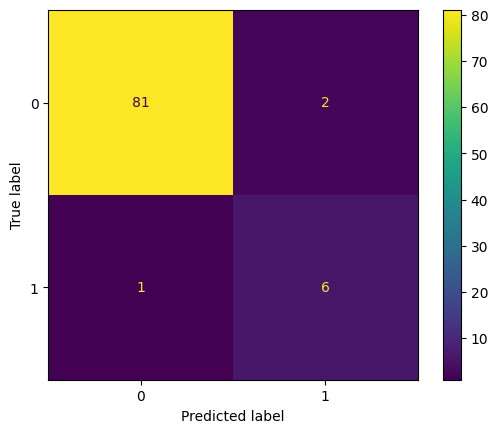

In [24]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred3, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [25]:
y_pred_final3 = grid_search2.best_estimator_.predict(x_test_final_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_scaled, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_final_scaled, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final3, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final3))

Training Accuracy: 1.0000
Testing Accuracy: 0.8333
F1 Score: 0.8410
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.40      0.50      0.44         4

    accuracy                           0.83        30
   macro avg       0.66      0.69      0.67        30
weighted avg       0.85      0.83      0.84        30



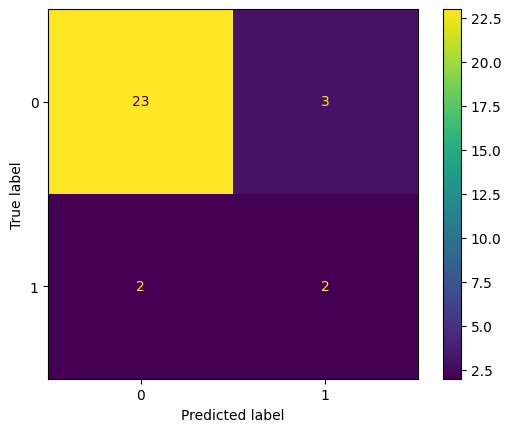

In [26]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final3, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [27]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 1000


## SMOTE

In [28]:
#pip install imbalanced-learn

In [30]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 24.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [33]:
grid_search2.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [34]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search2.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search2.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search2.best_estimator_))

GridSearch CV best score : 0.9517


Parameters that give the best results : 

 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=1)


In [35]:
y_pred4 = grid_search2.best_estimator_.predict(x_test)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_smote, y_train_smote)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred4, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred4))

Training Accuracy: 1.0000
Testing Accuracy: 0.8667
F1 Score: 0.8922
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        83
           1       0.37      1.00      0.54         7

    accuracy                           0.87        90
   macro avg       0.68      0.93      0.73        90
weighted avg       0.95      0.87      0.89        90



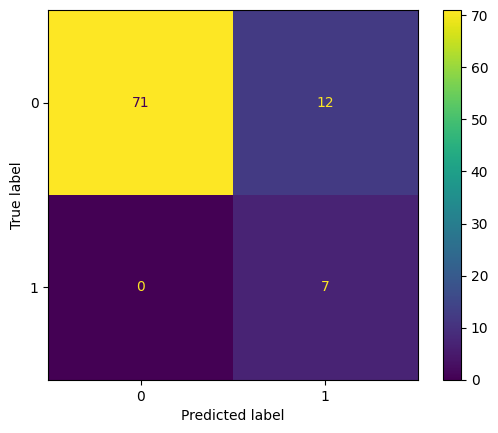

In [36]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred4, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [37]:
y_pred_final4 = grid_search2.best_estimator_.predict(x_test_final)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_smote, y_train_smote)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_final, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final4, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final4))

Training Accuracy: 1.0000
Testing Accuracy: 0.8333
F1 Score: 0.8410
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.40      0.50      0.44         4

    accuracy                           0.83        30
   macro avg       0.66      0.69      0.67        30
weighted avg       0.85      0.83      0.84        30



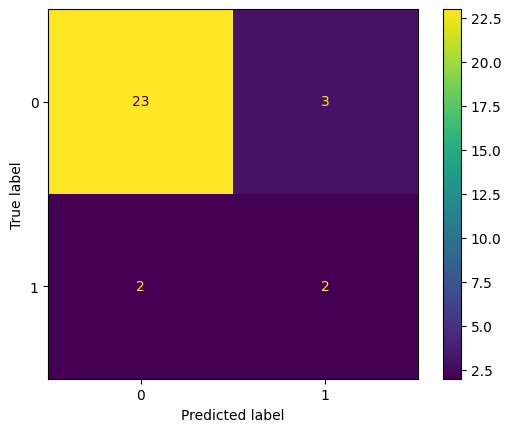

In [38]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final4, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [39]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 1000


## SMOTE+MinMaxScaler

In [40]:
x_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(x_train_scaled, y_train)

In [41]:
grid_search2.fit(x_train_smote_scaled, y_train_smote_scaled)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [42]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search2.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search2.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search2.best_estimator_))

GridSearch CV best score : 0.9234


Parameters that give the best results : 

 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=2)


In [43]:
y_pred5 = grid_search2.best_estimator_.predict(x_test_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_smote_scaled, y_train_smote_scaled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_scaled, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred5, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred5))

Training Accuracy: 1.0000
Testing Accuracy: 0.8111
F1 Score: 0.8521
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        83
           1       0.29      1.00      0.45         7

    accuracy                           0.81        90
   macro avg       0.65      0.90      0.67        90
weighted avg       0.94      0.81      0.85        90



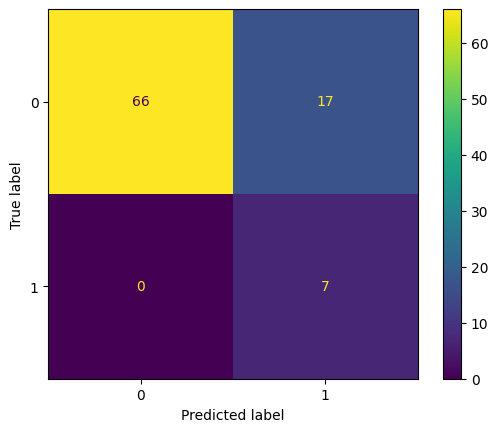

In [44]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred5, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [45]:
y_pred_final5 = grid_search2.best_estimator_.predict(x_test_final_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_smote_scaled, y_train_smote_scaled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_final_scaled, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final5, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final5))

Training Accuracy: 1.0000
Testing Accuracy: 0.7667
F1 Score: 0.7913
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.29      0.50      0.36         4

    accuracy                           0.77        30
   macro avg       0.60      0.65      0.61        30
weighted avg       0.83      0.77      0.79        30



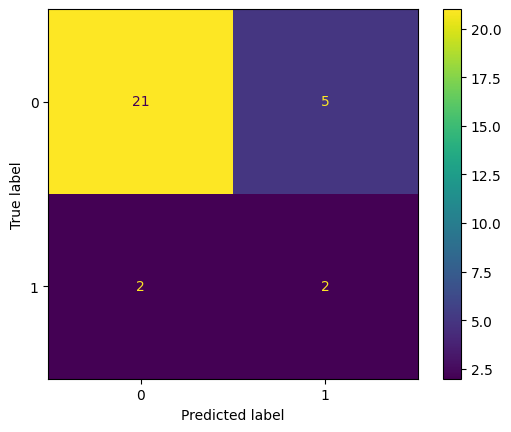

In [46]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final5, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [47]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 800


## Pearson Correlation - Features Selection + Normalization

In [48]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['TOP 4']
threshold = 0.20
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
df_pearson = df[selected_features]
selected_features

['W', 'L', 'WIN%', 'FG%', '3P%', 'FT%', 'BLKA', '+/-', 'TOP 4']

In [49]:
#Split in 70% train and 30% test set
train_df, test_df = train_test_split(df_pearson, test_size = 0.3, random_state= 42)
 
#Separate target label
y_train = train_df['TOP 4']
y_test = test_df['TOP 4']
 
#Drop target label
x_train = train_df.drop(['TOP 4'], axis = 1)
x_test = test_df.drop(['TOP 4'],   axis = 1)

In [50]:
df_pearson_final_test = df_final_test[selected_features]
df_pearson_final_test

x_test_final = df_pearson_final_test.drop(["TOP 4"], axis = 1)
y_test_final = df_pearson_final_test["TOP 4"]

In [51]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_final_scaled = scaler.transform(x_test_final)

In [52]:
grid_search2.fit(x_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [53]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search2.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search2.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search2.best_estimator_))

GridSearch CV best score : 0.8762


Parameters that give the best results : 

 {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=15, weights='distance')


In [54]:
y_pred6 = grid_search2.best_estimator_.predict(x_test_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_scaled, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_scaled, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test, y_pred6, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred6))

Training Accuracy: 1.0000
Testing Accuracy: 0.9333
F1 Score: 0.9333
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.57      0.57      0.57         7

    accuracy                           0.93        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.93      0.93      0.93        90



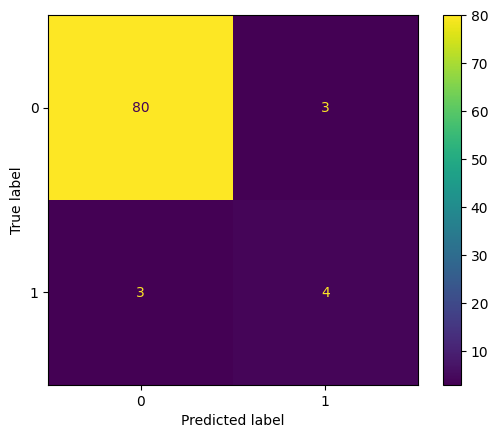

In [55]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred6, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

In [56]:
y_pred_final6 = grid_search2.best_estimator_.predict(x_test_final_scaled)

# Calculate accuracy on the training set
training_accuracy = grid_search2.best_estimator_.score(x_train_scaled, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate accuracy on the testing set
testing_accuracy = grid_search2.best_estimator_.score(x_test_final_scaled, y_test_final)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate the F1 score using the true labels and predicted labels on the test set
f1 = f1_score(y_test_final, y_pred_final6, average="weighted")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test_final, y_pred_final6))

Training Accuracy: 1.0000
Testing Accuracy: 0.8667
F1 Score: 0.8469
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.50      0.25      0.33         4

    accuracy                           0.87        30
   macro avg       0.70      0.61      0.63        30
weighted avg       0.84      0.87      0.85        30



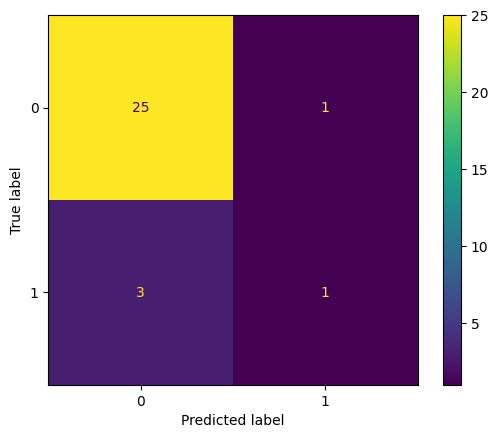

In [57]:
labels = [0,1]
cm = confusion_matrix(y_test_final, y_pred_final6, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [58]:
#expected_value_calculator(TP,TN,FP,FN)
TN, FP, FN, TP = cm.ravel()
expected_value_calculator(TP,TN,FP,FN)

Expected Value: 1000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70fbdbb3-a702-4c85-bc26-c75e4cfeedbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>